### Objective For this Assignment:

* To load and analyze a dataset using the pandas library in Python.
* To create simple plots and charts with the matplotlib library for visualizing the data.

#### Submission Requirements
* Submit a Jupyter notebook (.ipynb file) or Python script (.py file) containing:

* >> Data loading and exploration steps.
* >> Basic data analysis results.
* >> Visualizations.
* >> Any findings or observation

### Task 1: Load and Explore the Dataset

1. **Choose a Dataset**: Select a dataset in CSV format (e.g., the Iris dataset, a sales dataset, or any dataset of your choice).
2. **Load the Dataset**: Use the `pandas` library to load the dataset.
3. **Inspect the Data**: Display the first few rows of the dataset using `.head()` to understand its structure.
4. **Explore the Structure**:
   - Check the data types of each column.
   - Identify any missing values in the dataset.
5. **Clean the Dataset**: Handle missing values by either filling them with appropriate values or dropping the rows/columns containing them.

In [78]:
# Import libraries
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


In [88]:
# Load the dataset
try:
    df = pd.read_csv("mental-illnesses-prevalence.csv")
except FileNotFoundError:
    print("Error: The file 'mental-illnesses-prevalence.csv' was not found.")
    df = pd.DataFrame()
except pd.errors.EmptyDataError:
    print("Error: The file 'mental-illnesses-prevalence.csv' is empty.")
    df = pd.DataFrame()
except pd.errors.ParserError:
    print("Error: The file 'mental-illnesses-prevalence.csv' could not be parsed.")
    df = pd.DataFrame()
if df.empty:
    print("The DataFrame is empty. Please check the CSV file.")
else:
    print("DataFrame loaded successfully.")


DataFrame loaded successfully.


In [42]:
# Inspect the first few rows of the dataset
df.head()

,Entity,Code,Year,Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized,Depressive disorders (share of population) - Sex: Both - Age: Age-standardized,Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized,Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized,Eating disorders (share of population) - Sex: Both - Age: Age-standardized
0,Afghanistan,AFG,1990,0.223206,4.996118,4.713314,0.703023,0.127700
1,Afghanistan,AFG,1991,0.222454,4.989290,4.702100,0.702069,0.123256
2,Afghanistan,AFG,1992,0.221751,4.981346,4.683743,0.700792,0.118844
3,Afghanistan,AFG,1993,0.220987,4.976958,4.673549,0.700087,0.115089
4,Afghanistan,AFG,1994,0.220183,4.977782,4.670810,0.699898,0.111815


In [43]:
# Check the structure and data types of the dataset
print("The dataset has the following rows, and data types:\n")
df.info()

The dataset has the following rows, and data types:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6420 entries, 0 to 6419
Data columns (total 8 columns):
 #   Column                                                                             Non-Null Count  Dtype  
---  ------                                                                             --------------  -----  
 0   Entity                                                                             6420 non-null   object 
 1   Code                                                                               6150 non-null   object 
 2   Year                                                                               6420 non-null   int64  
 3   Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized  6420 non-null   float64
 4   Depressive disorders (share of population) - Sex: Both - Age: Age-standardized     6420 non-null   float64
 5   Anxiety disorders (share of population) - Sex: Both 

In [44]:
# Identify missing values
print("\nMissing values in each column:\n")
print(df.isnull().sum())



Missing values in each column:

Entity                                                                                 0
Code                                                                                 270
Year                                                                                   0
Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized      0
Depressive disorders (share of population) - Sex: Both - Age: Age-standardized         0
Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized            0
Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized            0
Eating disorders (share of population) - Sex: Both - Age: Age-standardized             0
dtype: int64


In [45]:
# With only 270 missing values in the code column. 
# We can choose to backfill these rows for simplicity.

df.bfill(inplace=True)

### Task 2: Basic Data Analysis

1. **Compute Basic Statistics**:
   - Use `.describe()` to calculate basic statistics (e.g., mean, median, standard deviation) for numerical columns.

2. **Perform Groupings**:
   - Group the dataset by a categorical column (e.g., species, region, or department).
   - Compute the mean of a numerical column for each group.

3. **Identify Patterns**:
   - Analyze the grouped data to identify any patterns or interesting findings.
   - Summarize your observations based on the analysis.

In [46]:
# Computing basic statistics of numeric columns
print("\nBasic statistics of the dataset:\n")
df.describe()


Basic statistics of the dataset:



,Year,Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized,Depressive disorders (share of population) - Sex: Both - Age: Age-standardized,Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized,Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized,Eating disorders (share of population) - Sex: Both - Age: Age-standardized
count,6420.000000,6420.000000,6420.000000,6420.000000,6420.000000,6420.000000
mean,2004.500000,0.266604,3.767036,4.101840,0.636968,0.195664
std,8.656116,0.039383,0.925286,1.050543,0.233391,0.138380
min,1990.000000,0.188416,1.522333,1.879996,0.181667,0.044780
25%,1997.000000,0.242267,3.080036,3.425846,0.520872,0.096416
50%,2004.500000,0.273477,3.636772,3.939547,0.579331,0.144150
75%,2012.000000,0.286575,4.366252,4.564164,0.844406,0.251167
max,2019.000000,0.462045,7.645899,8.624634,1.506730,1.031688


In [60]:
# Grouping data by year 
Grouped_data = df.groupby('Entity')['Depressive disorders (share of population) - Sex: Both - Age: Age-standardized'].mean().reset_index()

# Show a summary of the yearly data
print("\n Mean Depressive disorders (share of population) - Sex: Both - Age: Age-standardized by Entity:\n")
Grouped_data.head()


 Mean Depressive disorders (share of population) - Sex: Both - Age: Age-standardized by Entity:



,Entity,Depressive disorders (share of population) - Sex: Both - Age: Age-standardized
0,Afghanistan,4.968072
1,Africa (IHME GBD),4.557986
2,Albania,2.434626
3,Algeria,4.132249
4,America (IHME GBD),3.691891


Afghanistan and Africa(IHME GBD) show the highest prevalence of depressive disorders with over 4.5% and Albania showing the least prevalence at less that 2.5%

The grouped data highlights disparities in depressive disorder prevalence across different countries. Further analysis could explore correlations with other factors, such as GDP, healthcare infrastructure, or population density, to better understand these patterns.

### Task 3: Data Visualization

1. **Create at least four different types of visualizations**:
   - **Line Chart**: showing trends over time (for example, a time-series of sales data).
   - **Bar Chart**: showing the comparison of a numerical value across categories (e.g., average petal length per species).
   - **Histogram**: of a numerical column to understand its distribution.
   - **Scatter Plot**: to visualize the relationship between two numerical columns (e.g., sepal length vs. petal length).


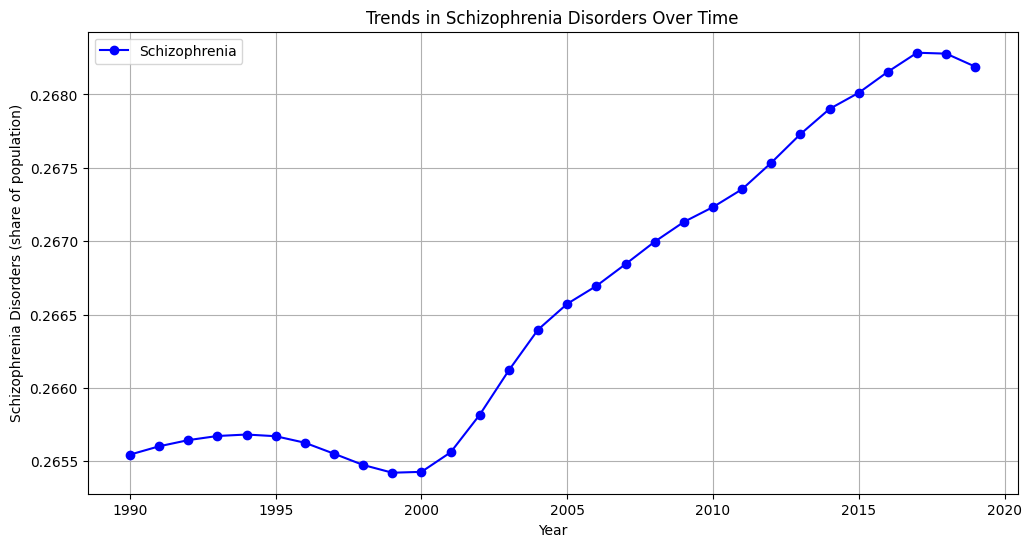

In [66]:
# Chart one
# Line chart showing trends over time (distribution of the data over the years).
plt.figure(figsize=(12, 6))
line_data = df.groupby('Year')['Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized'].mean()
plt.plot(line_data.index, line_data.values, marker='o', color='b', label='Schizophrenia')
plt.title('Trends in Schizophrenia Disorders Over Time')
plt.xlabel('Year')
plt.ylabel('Schizophrenia Disorders (share of population)')
plt.grid()
plt.legend()
plt.show()


The chart reveals a significant increase in schizophrenia prevalence after 2000, peaking around 2015.

This trend could be analyzed further to understand the underlying causes, such as changes in healthcare reporting, population growth, or environmental factors

In [67]:
df.columns

Index(['Entity', 'Code', 'Year',
       'Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized',
       'Depressive disorders (share of population) - Sex: Both - Age: Age-standardized',
       'Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized',
       'Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized',
       'Eating disorders (share of population) - Sex: Both - Age: Age-standardized'],
      dtype='object')

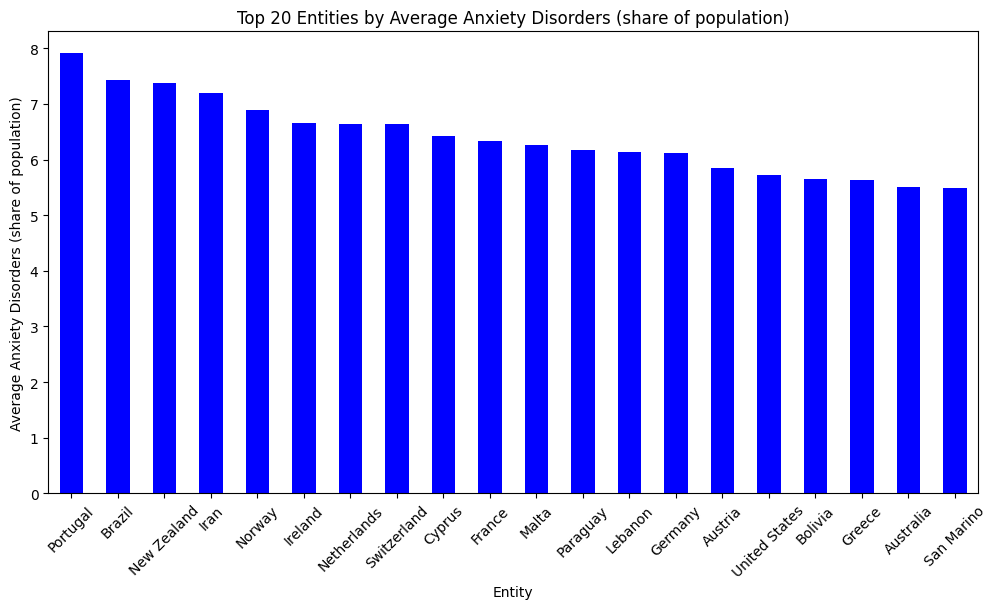

In [71]:
# Chart two 
# Bar chart showing the comparison of a numerical value across categories 
plt.figure(figsize=(12, 6))
bar_data = df.groupby('Entity')['Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized'].mean().sort_values(ascending=False).head(20)
bar_data.plot(kind='bar', color='blue')
plt.title('Top 20 Entities by Average Anxiety Disorders (share of population)')
plt.xlabel('Entity')
plt.ylabel('Average Anxiety Disorders (share of population)')
plt.xticks(rotation=45)
plt.show()


The bar chart visualizes the top 20 entities (countries or regions) with the highest average prevalence of anxiety disorders (share of population).

Portugal has the highest average prevalence of anxiety disorders, followed by Brazil and New Zealand.

Countries with higher prevalence may have unique socioeconomic, cultural, or healthcare factors contributing to these values.

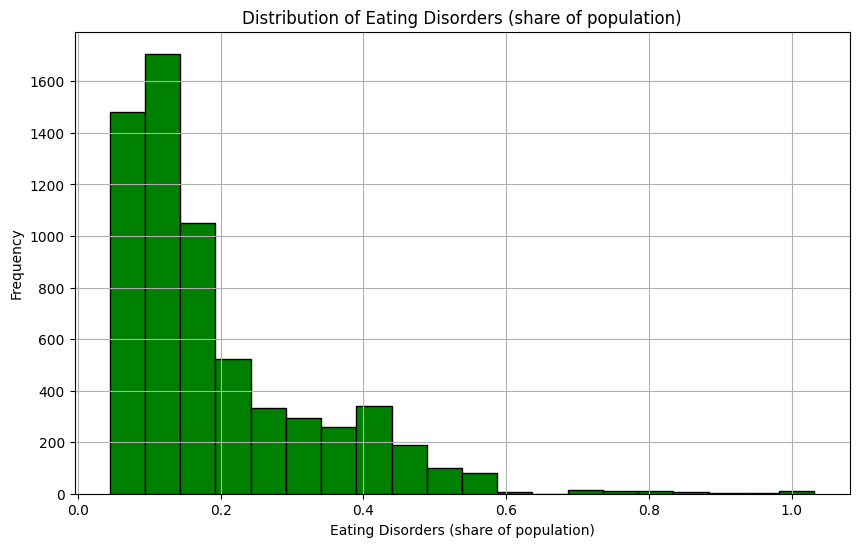

In [76]:
# Chart three
# Histogram of a numerical column to understand its distribution.
plt.figure(figsize=(10, 6))
Hist_data = df['Eating disorders (share of population) - Sex: Both - Age: Age-standardized']
plt.hist(Hist_data.dropna(), bins=20, color='green', edgecolor='black')
plt.title('Distribution of Eating Disorders (share of population)')
plt.xlabel('Eating Disorders (share of population)')
plt.ylabel('Frequency') 
plt.grid()
plt.show()

The histogram shows a right-skewed distribution, with most entities having a low prevalence of eating disorders (below 0.2)

There are a few entities with prevalence values closer to 1.0, which could be outliers or regions with unique factors contributing to higher rates.

The majority of entities fall within the first few bins (0.0–0.2), indicating that eating disorders are relatively uncommon in most regions.

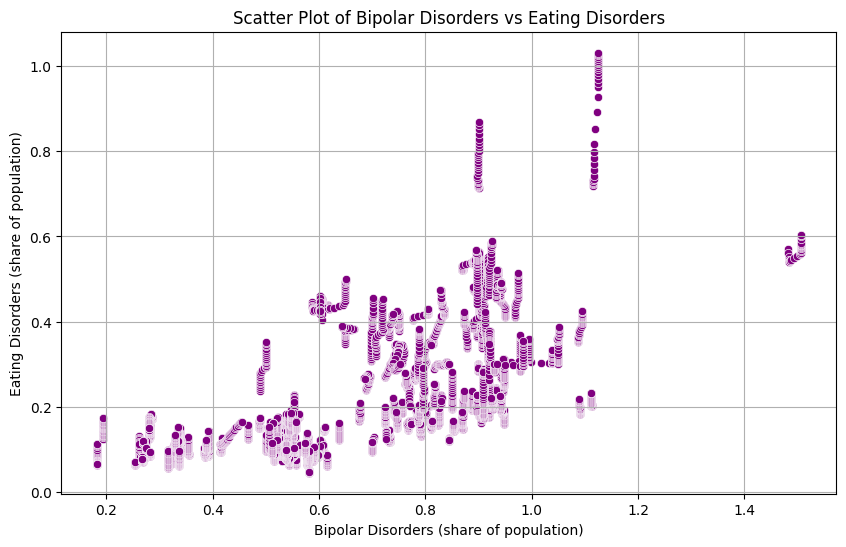

In [87]:
# Chart four
# Scatter plot to visualize the relationship between two numerical columns
plt.figure(figsize=(10, 6))
scatter_data = df[['Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized',
                    'Eating disorders (share of population) - Sex: Both - Age: Age-standardized']]
sns.scatterplot(data=scatter_data, x='Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized',
                y='Eating disorders (share of population) - Sex: Both - Age: Age-standardized', 
                color='purple')
plt.title('Scatter Plot of Bipolar Disorders vs Eating Disorders')
plt.xlabel('Bipolar Disorders (share of population)')
plt.ylabel('Eating Disorders (share of population)')
plt.grid()
plt.show()

Each point represents an entity (country or region) in the dataset.
The position of the point indicates the prevalence of bipolar disorders (x-axis) and eating disorders (y-axis) for that entity.

A few entities have higher prevalence values for bipolar disorders (above 1.2) and eating disorders (above 0.8). These could be outliers or regions with unique factors contributing to higher rates.

There are clusters of points around lower values (e.g., bipolar disorders below 0.6 and eating disorders below 0.4), indicating that most entities have relatively low prevalence rates for both disorders.

The plot suggests a positive correlation between bipolar disorders and eating disorders. As the prevalence of bipolar disorders increases, the prevalence of eating disorders tends to increase as well.